## Домашнее задание
- Выберите ряд и постройте его модель GARCH.
- **Не обязательное дз.** Попробуйте спрогнозировать график классическим ML

In [12]:
from arch import arch_model
import pandas as pd
import numpy as np
from utils import tsplot, prepareData
from scipy.stats import boxcox
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [13]:
series = pd.read_csv('monthly-boston-armed-robberies-j.csv').values[:, 1].astype(int)

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


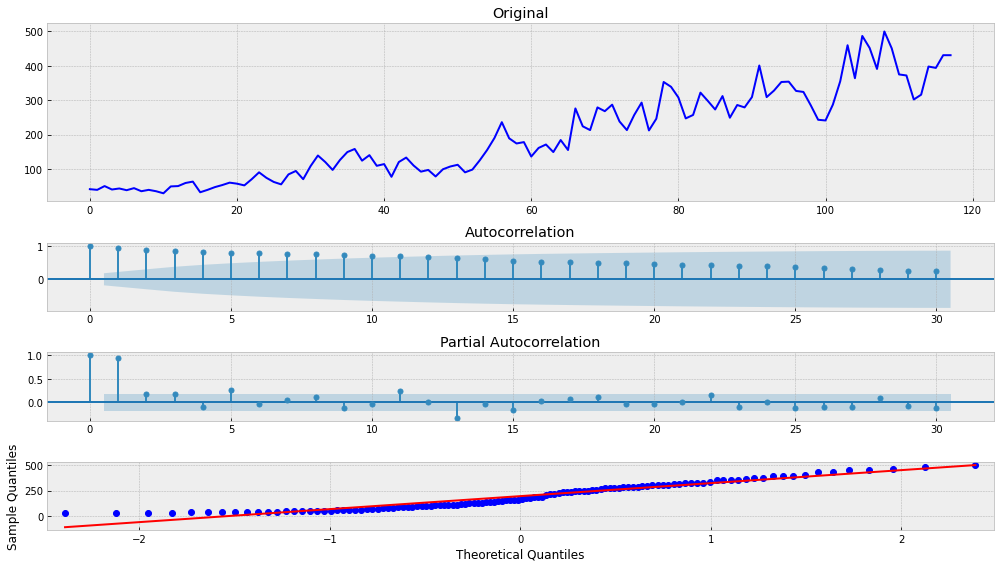

In [14]:
tsplot(series, lags=30)

Приводим ряд к стационарному виду

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


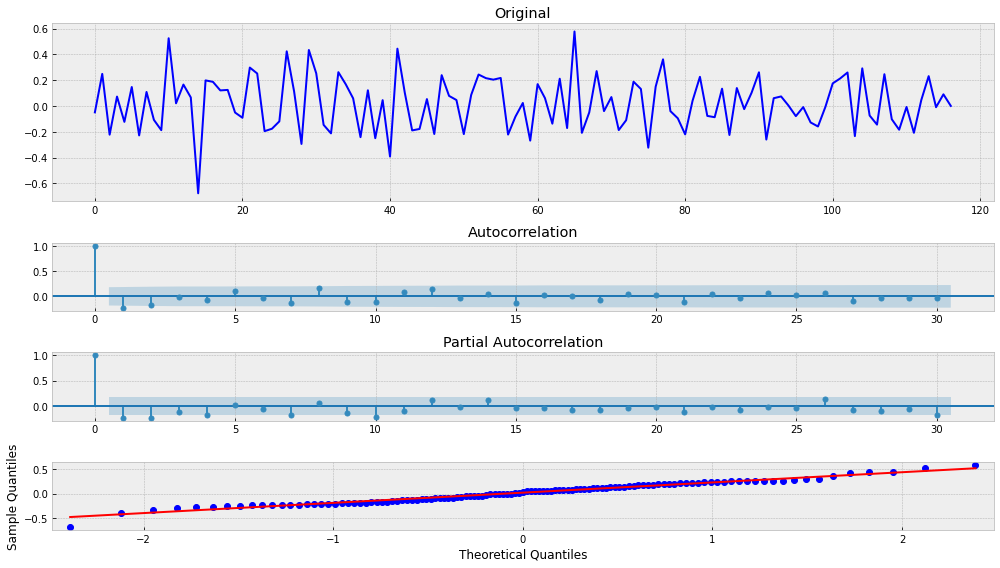

In [15]:
series = boxcox(series, 0)
series = np.diff(series, 1)
tsplot(series, lags=30)

модель GARCH

In [16]:
am = arch_model(series)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: -19.965805074071344
Iteration:     10,   Func. Count:     60,   Neg. LLF: -20.693794456200074
Optimization terminated successfully    (Exit mode 0)
            Current function value: -20.69379445344294
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                20.6938
Distribution:                  Normal   AIC:                          -33.3876
Method:            Maximum Likelihood   BIC:                          -22.3389
                                        No. Observations:                  117
Date:                Fri, Feb 19 2021   Df Residuals:                      116
Time:     

/home/dmi/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.04251. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


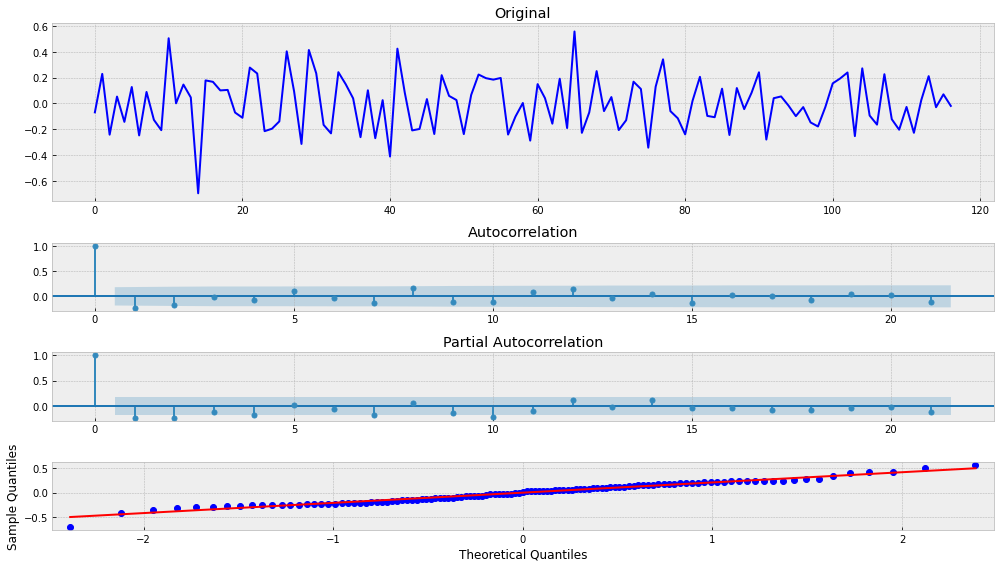

In [17]:
tsplot(res.resid)

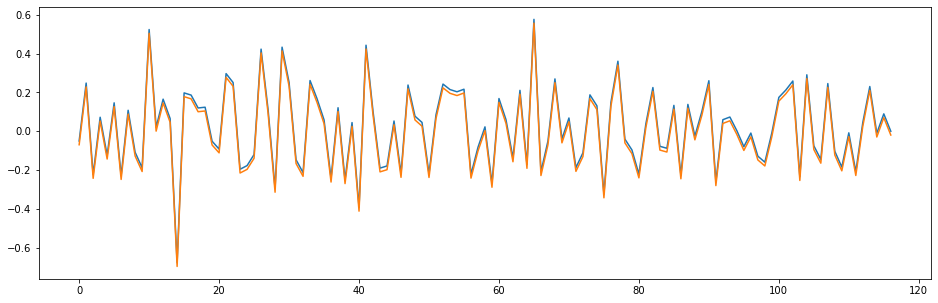

In [18]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=series);
sns.lineplot(data=res.resid);

Линейная регрессия с лагами исходного ряда в качестве признаков

In [19]:
X_train, X_test, y_train, y_test = prepareData(series, lag_start=1, lag_end=20, test_size=0.3)

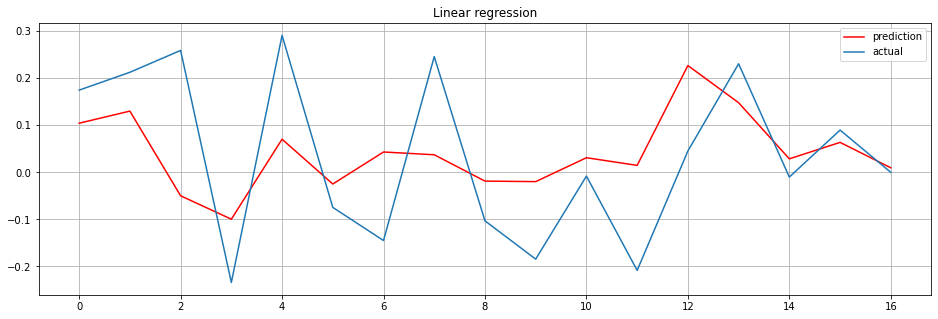

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

plt.figure(figsize=(16, 5))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression")
plt.grid(True);